# SQLite + Chemspipy

    ## How to fetch chem compound data and store them in a mySQL db -primer

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#if the database does not exist it will be created:

In [14]:
conn = sqlite3.connect('my_first_base.db')

In [15]:
# we create a first table :

In [16]:
# cursor creation + table creation + commit

In [17]:
cursor = conn.cursor()
cursor.execute(
"""
CREATE TABLE IF NOT EXISTS chems(
     id INTEGER PRIMARY KEY AUTOINCREMENT UNIQUE,
     compound TEXT,
     formula TEXT,
     mass INTEGER)
"""
)

conn.commit()

In [ ]:
# data insertion

In [18]:
try :
    cursor.execute(
    """
    INSERT INTO chems(compound, formula,mass) VALUES(?, ?, ?)
    """, 
    ("eau", "H2O", "18")
    )
    conn.commit()
except SyntaxError as e:
    print(e)
        


In [19]:
data = {"a_name" : "sodium hypochloride", "a_formula" : "NaClO3", "a_mass": 74}
cursor.execute(
"""
INSERT OR IGNORE INTO chems(compound, formula,mass) VALUES(:a_name, :a_formula, :a_mass)
""", data)
conn.commit()

In [20]:
#add a list of compounds with "executemany"

In [21]:
my_compounds = []
my_compounds.append(("salt", "NaCl", 58))
my_compounds.append(("carbon dioxide", "CO2",44))

cursor.executemany(
"""
INSERT OR IGNORE INTO chems(compound, formula,mass) VALUES(?, ?, ?)
""", my_compounds)
conn.commit()

In [22]:
cursor.execute("""SELECT compound, formula, mass FROM chems""")
query1 = cursor.fetchall()
print("\n".join([str(el) for el in query1]))

(u'eau', u'H2O', 18)
(u'sodium hypochloride', u'NaClO3', 74)
(u'eau', u'H2O', 18)
(u'sodium hypochloride', u'NaClO3', 74)
(u'salt', u'NaCl', 58)
(u'carbon dioxide', u'CO2', 44)


In [23]:
def select_all(tb="chems"):
    cursor.execute("""SELECT * FROM {0}""".format(tb))
    query2 = cursor.fetchall()
    return(query2)

In [24]:
select_all()

[(1, u'eau', u'H2O', 18),
 (2, u'sodium hypochloride', u'NaClO3', 74),
 (3, u'eau', u'H2O', 18),
 (4, u'sodium hypochloride', u'NaClO3', 74),
 (5, u'salt', u'NaCl', 58),
 (6, u'carbon dioxide', u'CO2', 44)]

In [25]:
cursor.execute("""SELECT mass FROM chems""")
query3 = cursor.fetchall()
print(query3)

[(18,), (74,), (18,), (74,), (58,), (44,)]


In [26]:
my_id=2

try:
    cursor.execute("""SELECT id,mas FROM chems WHERE id=?""", (my_id,))
    response = cursor.fetchone()
    print(response)
except sqlite3.OperationalError as e:
    print("there was a mistake in ur query")
    print(e)
    

there was a mistake in ur query
no such column: mas


In [27]:
def remove_based_on_name_entries(my_removes=["assan","jane"]):
    try:
        for el in my_removes:
            cursor.execute("""DELETE FROM chems WHERE compound =?""", (str(el),))
            print("the action was successful : {0} was removed".format(str(el)))
            
    except sqlite3.OperationalError as e:
        print("there was a mistake in ur query")
        print(e)
        

In [28]:
remove_based_on_name_entries()

the action was successful : assan was removed
the action was successful : jane was removed


In [29]:
#let's fetch the ouputted table to a pandas dataFrame

In [30]:
query=select_all("chems")

In [31]:
output_table=pd.DataFrame(query)
output_table.columns=["id","name","formula","mass"]
output_table.set_index('id', inplace=True)
output_table

,name,formula,mass
id,,,
1,eau,H2O,18
2,sodium hypochloride,NaClO3,74
3,eau,H2O,18
4,sodium hypochloride,NaClO3,74
5,salt,NaCl,58
6,carbon dioxide,CO2,44


In [32]:
import chemspipy 
from chemspipy import ChemSpider as cs
import base64

In [33]:
cs_session=cs("a99b4910-4d77-44df-a07a-e5833cfb6a0e")

In [34]:
cs_gc=cs_session.search('Glucose')

In [35]:
def display_c(c_id="01"):
    with open ("f.png", 'wb') as f:
        f.write(cs_session.get_compound_thumbnail(c_id))
    img=plt.imread("f.png")
    plt.title(c_id)
    plt.imshow(img)
    plt.show()
    

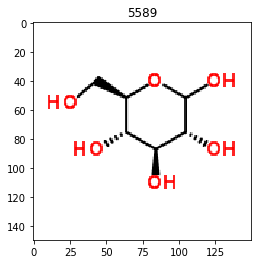

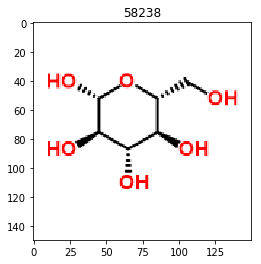

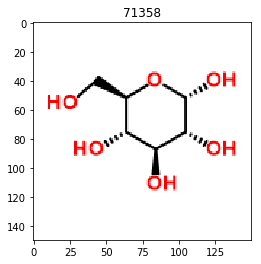

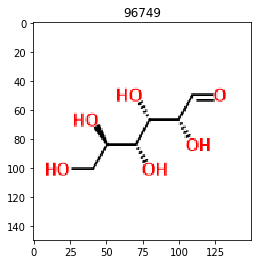

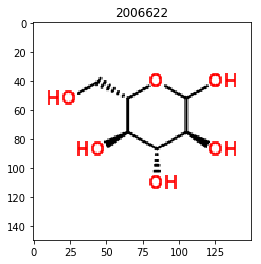

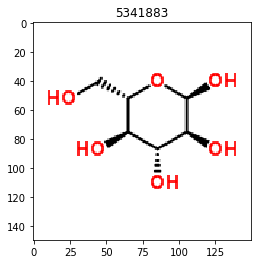

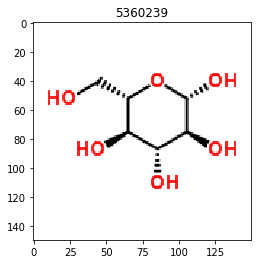

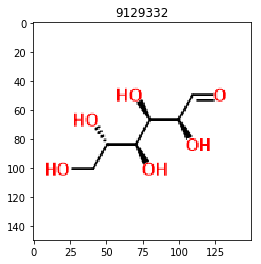

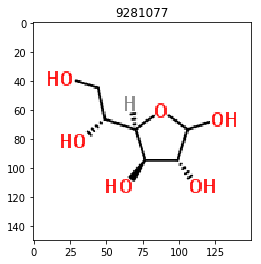

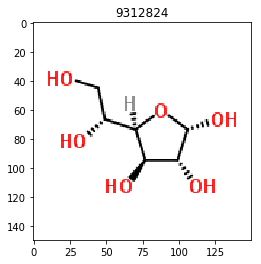

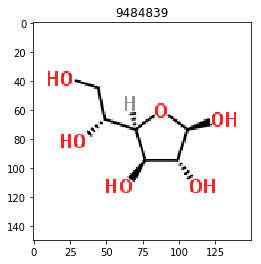

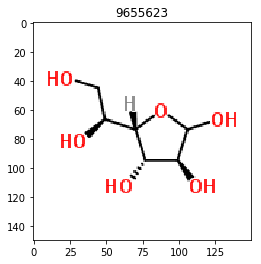

[None, None, None, None, None, None, None, None, None, None, None, None]

In [36]:
[display_c(rs.csid) for rs in cs_gc]

In [37]:
[[rs.csid,rs.common_name,rs.average_mass] for rs in cs_gc]

[[5589, u'D-Glucopyranose', 180.1559],
 [58238, u'.beta.-D-Glucopyranose', 180.1559],
 [71358, u'.alpha.-D-Glucopyranose', 180.1559],
 [96749, u'D-(+)-Glucose', 180.1559],
 [2006622, u'L-glucopyranose', 180.1559],
 [5341883, u'alpha-L-Glucopyranose', 180.1559],
 [5360239, u'beta-L-Glucopyranose', 180.1559],
 [9129332, u'L-(&minus;)-Glucose', 180.1559],
 [9281077, u'D-Glucofuranose', 180.1559],
 [9312824, u'alpha-D-Glucofuranose', 180.1559],
 [9484839, u'beta-D-Glucofuranose', 180.1559],
 [9655623, u'L-Glucofuranose', 180.1559]]

In [38]:
my_compounds = [(rs.csid,rs.common_name,rs.average_mass) for rs in cs_gc]
cursor.executemany(
"""
INSERT INTO chems(compound, formula,mass) VALUES(?, ?, ?)
""", my_compounds)
conn.commit()

In [40]:
# cursor creation + table deletion + commit

In [41]:
cursor = conn.cursor()
cursor.execute(
"""
DROP TABLE chems
""")
conn.commit()

In [42]:
#close the connection to the database

In [287]:
conn.close()